In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
d1 = {'x': [1, 2, 3,  4,  5, 6, 7, 8, 9],
     'y':  [2, 18, 15, 26, 29, 25,48,51,46]}
df = pd.DataFrame(d1)
df.head()

,x,y
0,1,2
1,2,18
2,3,15
3,4,26
4,5,29


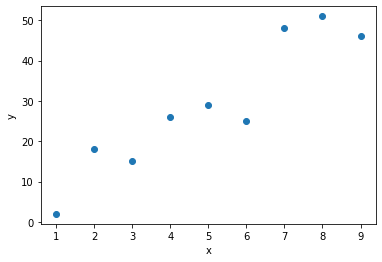

In [58]:
plt.scatter(df['x'],df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [59]:
x  = df[['x']]
y = df['y']

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [65]:
m1 = LinearRegression()
m1.fit(x,y)

LinearRegression()

In [66]:
print('Model score',m1.score(x,y))

Model score 0.8738157629510179


In [67]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
print(x_poly)
# x(a)  x_poly([1,a,a^2])

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]
 [ 1.  7. 49.]
 [ 1.  8. 64.]
 [ 1.  9. 81.]]


In [68]:
m2 = LinearRegression()
m2.fit(x_poly,y)
print('Model.score',m2.score(x_poly,y))

Model.score 0.8763314895143155


In [73]:
def poly_fit(x,y,dg):
    poly = PolynomialFeatures(degree=dg)
    x_poly = poly.fit_transform(x)
    print(f'Polynomial features at degree {dg} are')
    m = LinearRegression()
    m.fit(x_poly,y)
    print('Poly model score at degree',dg,'is',m.score(x_poly,y))

In [76]:
for i in range(1,7):
    poly_fit(x,y,dg=i)

Polynomial features at degree 1 are
Poly model score at degree 1 is 0.8738157629510179
Polynomial features at degree 2 are
Poly model score at degree 2 is 0.8763314895143155
Polynomial features at degree 3 are
Poly model score at degree 3 is 0.8768926850210865
Polynomial features at degree 4 are
Poly model score at degree 4 is 0.9310636954257194
Polynomial features at degree 5 are
Poly model score at degree 5 is 0.9350331184638788
Polynomial features at degree 6 are
Poly model score at degree 6 is 0.9385551356524873


In [77]:
def chk_poly_feat(x,y,dg):
    poly = PolynomialFeatures(degree=dg)
    x_poly = poly.fit_transform(x)
    print(f'Polynomial features at degree {dg} are')
    print(x_poly)

In [80]:
chk_poly_feat(x,y,3)

Polynomial features at degree 3 are
[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]
 [  1.   6.  36. 216.]
 [  1.   7.  49. 343.]
 [  1.   8.  64. 512.]
 [  1.   9.  81. 729.]]


In [ ]:
# No of Features     degree      Poly Features
#  1[a]                 1         1,a
#  1[a]                 2         1,a,a^2 
#  1[a]                 3         1,a,a^2,a^3 
#  1[a]                 4         1,a,a^2,a^3, a^4 

In [85]:
def poly_fit_pred_plot(x,y,dg):
    poly = PolynomialFeatures(degree=dg)
    x_poly = poly.fit_transform(x)
    m = LinearRegression()
    m.fit(x_poly,y)
    ypred = m.predict(x_poly)
    print(ypred)
    print('Poly model score at degree',dg,'is',m.score(x_poly,y))
    plt.scatter(df['x'],df['y'],label='actual data')
    plt.plot(df['x'],ypred,color='maroon',label='Predicted line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show()

[ 6.22222222 11.88888889 17.55555556 23.22222222 28.88888889 34.55555556
 40.22222222 45.88888889 51.55555556]
Poly model score at degree 1 is 0.8738157629510179


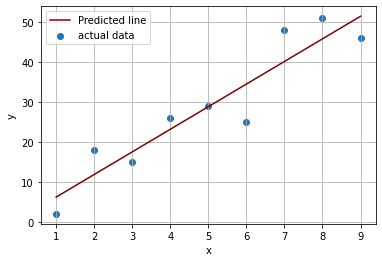

In [86]:
poly_fit_pred_plot(x,y,dg=1)

[ 4.96969697 11.57575758 17.91341991 23.98268398 29.78354978 35.31601732
 40.58008658 45.57575758 50.3030303 ]
Poly model score at degree 2 is 0.8763314895143155


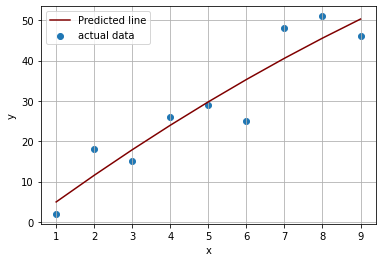

In [87]:
poly_fit_pred_plot(x,y,dg=2)

[ 5.46464646 11.32828283 17.45382395 23.66450216 29.78354978 35.63419913
 41.03968254 45.82323232 49.80808081]
Poly model score at degree 3 is 0.8768926850210865


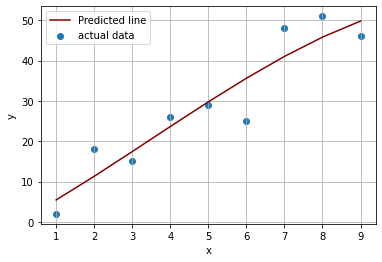

In [88]:
poly_fit_pred_plot(x,y,dg=3)

[ 2.04506605 16.45765346 20.14063714 21.46620047 25.38694639 33.43589744
 43.72649573 50.95260295 46.38850039]
Poly model score at degree 4 is 0.9310636954257194


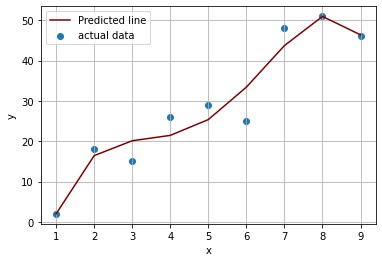

In [89]:
poly_fit_pred_plot(x,y,dg=4)

[ 2.59207459 14.95337995 20.68764569 22.6969697  25.38694639 32.20512821
 43.17948718 52.45687646 45.84149184]
Poly model score at degree 5 is 0.9350331184638788


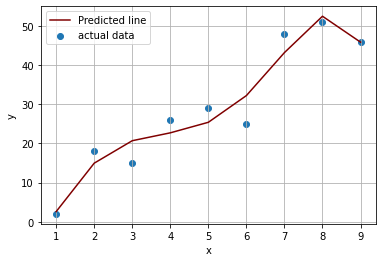

In [90]:
poly_fit_pred_plot(x,y,dg=5)